# Data Exploration

## Importing necessary Libraries and the data set.

Pour connaitre le dossier que Jupyter utilise pour acceder aux fichiers (datasets)

!echo %cd%

!dir

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


In [35]:
dataset = pd.read_csv("insurance.csv")

## Understanding the variables in the data set.

In [36]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Now Check the dimension of the given data set.

In [37]:
dataset.shape

(1338, 7)

## Dropping Duplicates rows in the columns if any

In [38]:
dataset = dataset.drop_duplicates()
dataset.shape

(1337, 7)

In [69]:
# dataset[dataset.isin(list(dataset.drop_duplicates()))].dropna()

we observe that there is one duplicate column in the data set.

## Using describe method

to have information about the variables

In [39]:
dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Using value_counts() method

on region and sex to identify the count of each category in that column.

In [40]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [41]:
dataset['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

## Creating Dummies

In [ ]:
#	age	sex	bmi	children	smoker_yes	smoker_no	region	charges
#0	19	female	27.900	0	1            0	southwest	16884.92400
#1	18	male	33.770	1	0            1	southeast	1725.55230
#2	28	male	33.000	3	0            1	southeast	4449.46200
#3	33	male	22.705	0	0            1	northwest	21984.47061
#4	32	male	28.880	0	0            1	northwest	3866.85520

In [42]:
old_dataset = dataset
dataset.shape

(1337, 7)

### Scikit Learn Way

In [71]:
from sklearn.preprocessing import LabelEncoder

x = old_dataset.iloc[:,:-1].values
y = old_dataset.iloc[:,6].values

print(x.shape)
print(x[:10])

labelencoder=LabelEncoder()
x[:,1]=labelencoder.fit_transform(x[:,1])         
x[:,4]=labelencoder.fit_transform(x[:,4])
x[:,5]=labelencoder.fit_transform(x[:,5])

print(x[:10])

(1337, 6)
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']
 [31 'female' 25.74 0 'no' 'southeast']
 [46 'female' 33.44 1 'no' 'southeast']
 [37 'female' 27.74 3 'no' 'northwest']
 [37 'male' 29.83 2 'no' 'northeast']
 [60 'female' 25.84 0 'no' 'northwest']]
[[19 0 27.9 0 1 3]
 [18 1 33.77 1 0 2]
 [28 1 33.0 3 0 2]
 [33 1 22.705 0 0 1]
 [32 1 28.88 0 0 1]
 [31 0 25.74 0 0 2]
 [46 0 33.44 1 0 2]
 [37 0 27.74 3 0 1]
 [37 1 29.83 2 0 0]
 [60 0 25.84 0 0 1]]


### Pandas way

In [44]:
dataset = pd.get_dummies(dataset, columns=['smoker', 'sex', 'region'])
dataset.shape

(1337, 12)

In [93]:
old_dataset.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
dataset.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


In [81]:
# dataset.head

## Using pairplot method

to understand the distribution of each variable with other

<AxesSubplot:xlabel='age', ylabel='Count'>

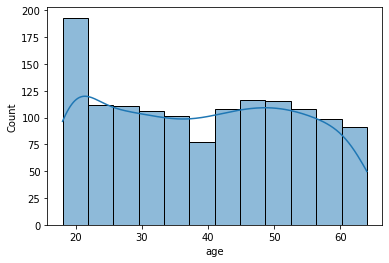

In [77]:
sb.histplot(dataset['age'], kde=True)

<AxesSubplot:xlabel='age', ylabel='charges'>

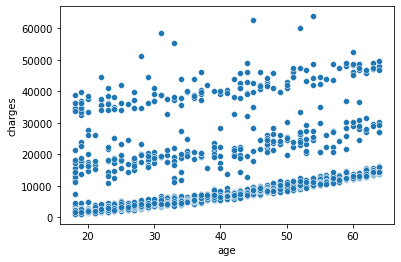

In [76]:
# sb.scatterplot(dataset, x='age', y='charges')
sb.scatterplot(x=dataset['age'], y=dataset['charges'])

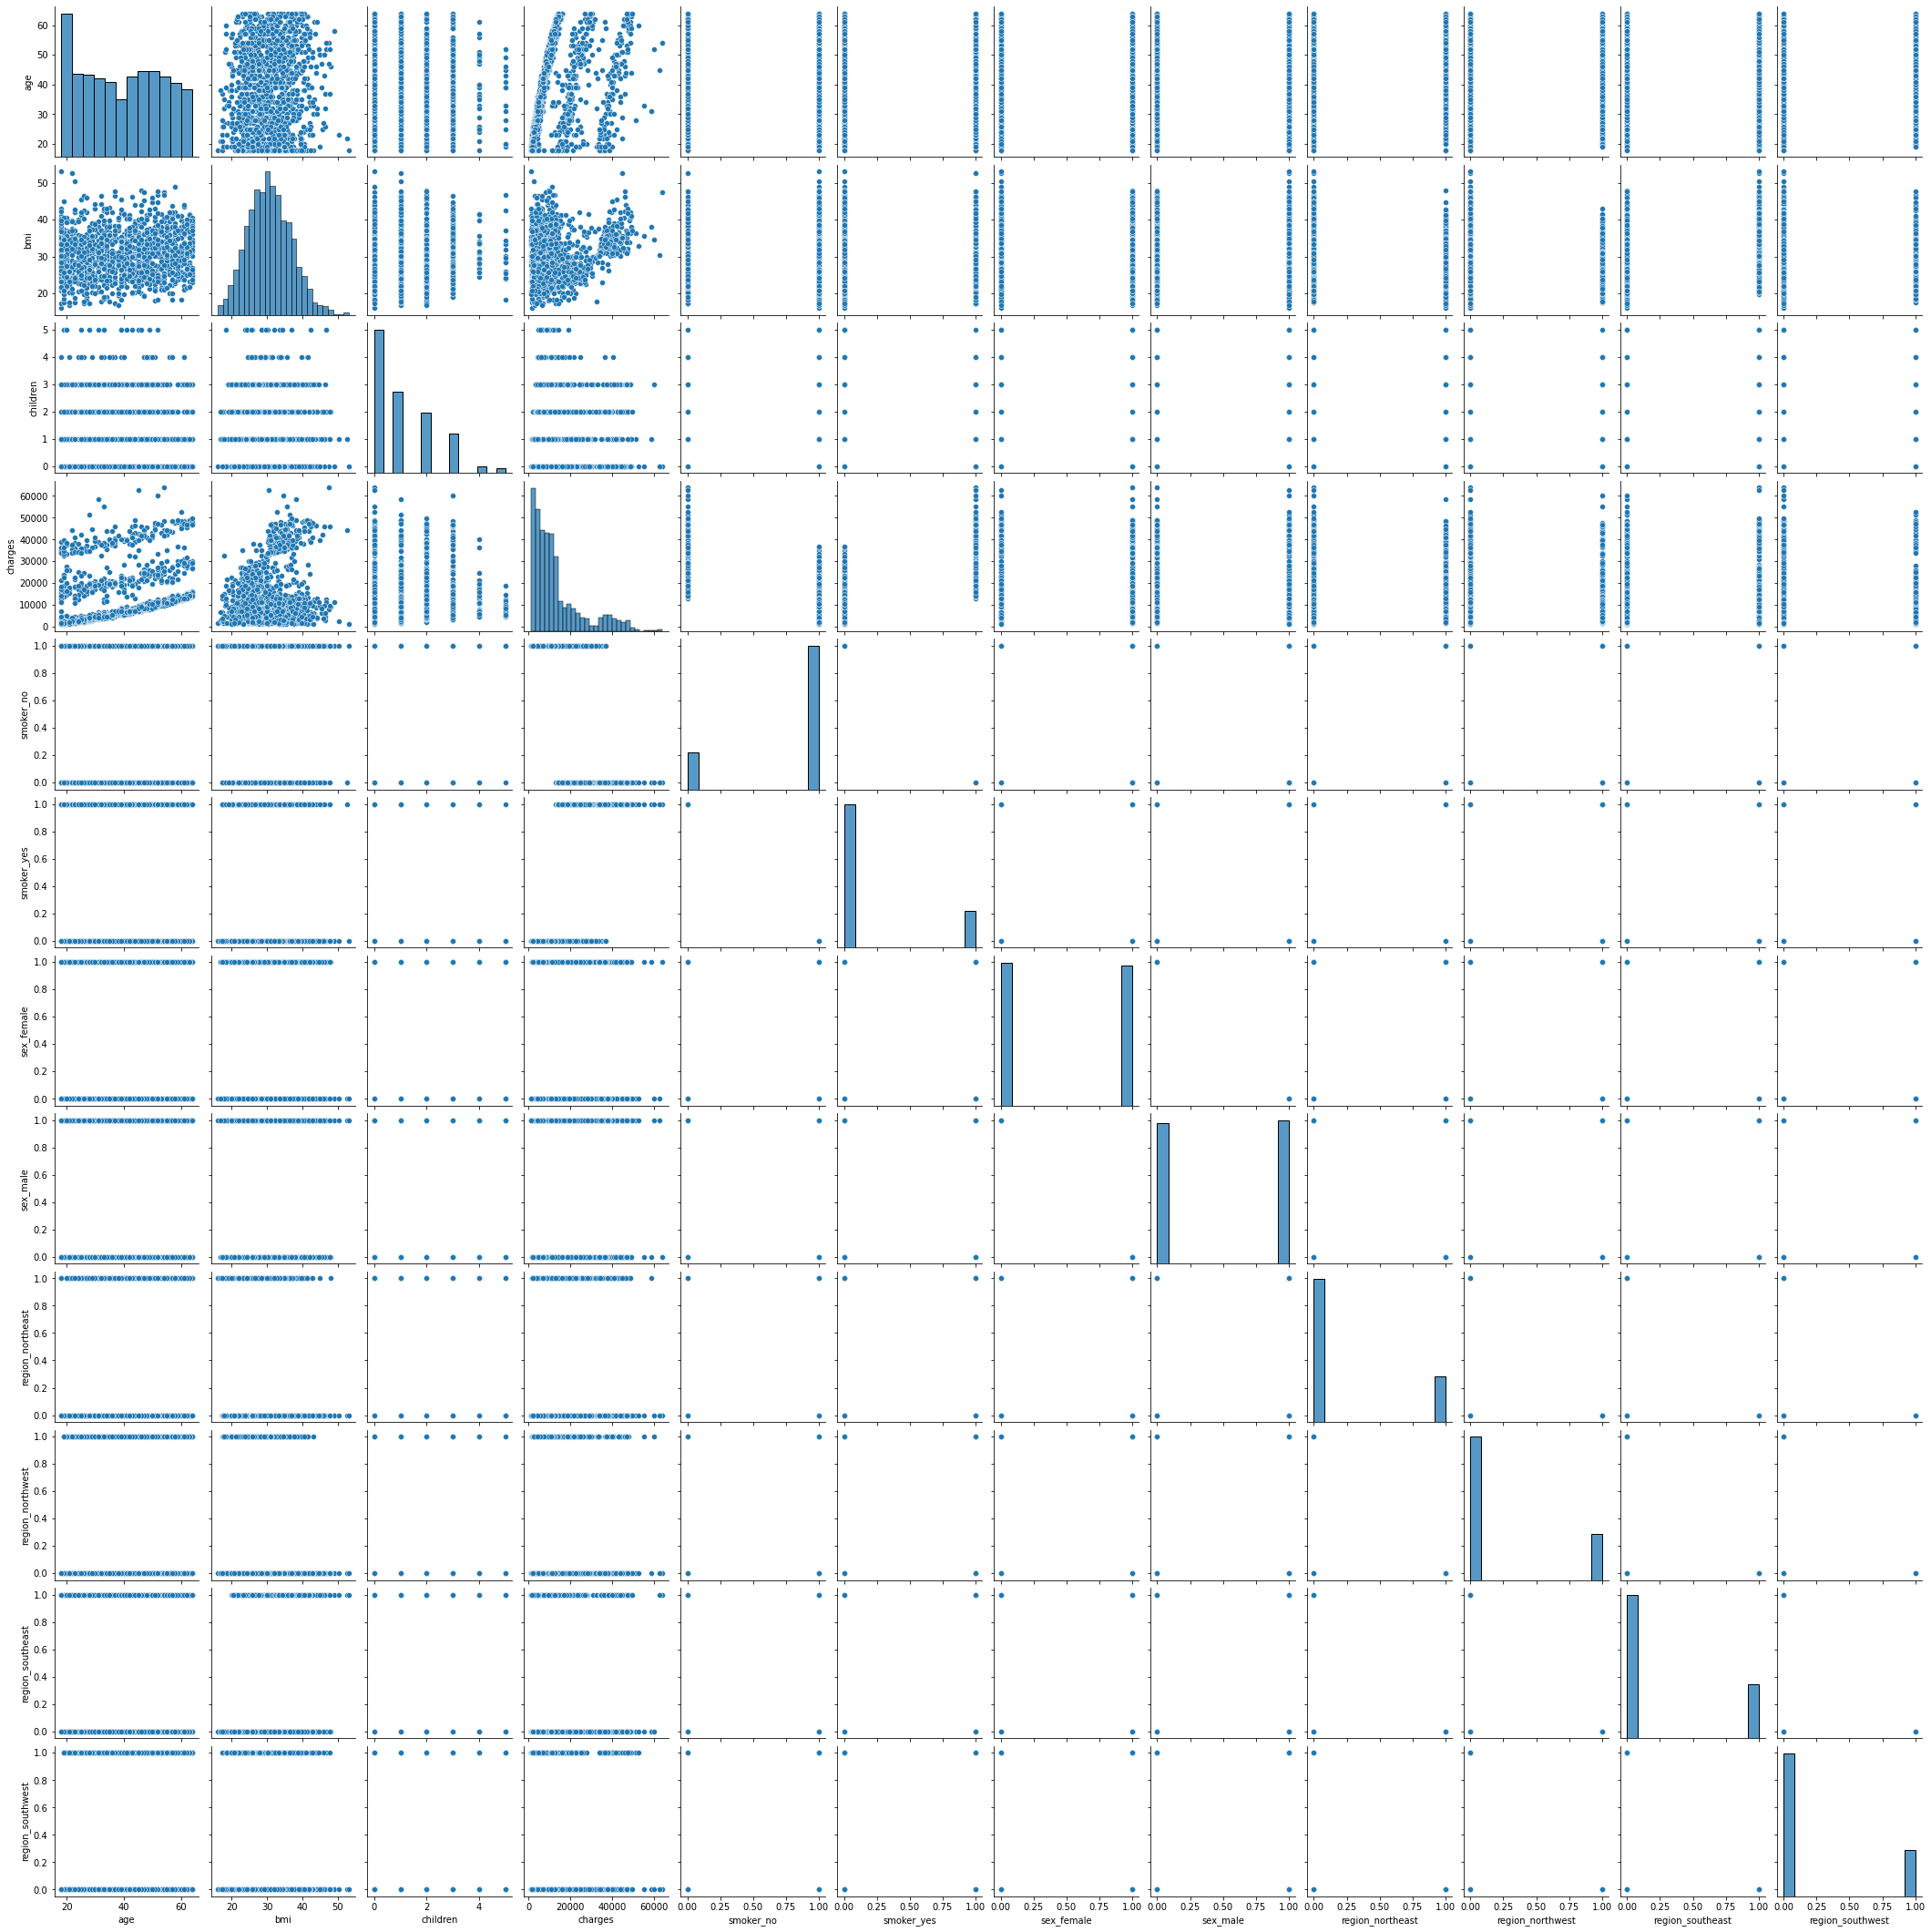

In [85]:
sb.pairplot(dataset)

## Plotting heat map

to understand the correlation of variables

<AxesSubplot:xlabel='age', ylabel='age'>

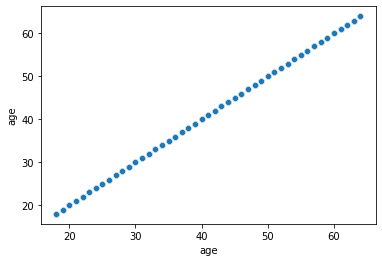

In [79]:
sb.scatterplot(x=dataset['age'], y=dataset['age'])

In [86]:
# sb.scatterplot(x=dataset['region_northwest'], y=dataset['smoker_no'], x_jitter=True, y_jitter=True)

In [78]:
dataset.corr()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,0.025587,-0.025587,0.019814,-0.019814,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,-0.003746,0.003746,-0.046397,0.046397,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,-0.007331,0.007331,-0.017848,0.017848,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,-0.787234,0.787234,-0.058044,0.058044,0.005945,-0.038695,0.073578,-0.043637
smoker_no,0.025587,-0.003746,-0.007331,-0.787234,1.000000,-1.000000,0.076596,-0.076596,-0.002597,0.036321,-0.068282,0.037168
smoker_yes,-0.025587,0.003746,0.007331,0.787234,-1.000000,1.000000,-0.076596,0.076596,0.002597,-0.036321,0.068282,-0.037168
sex_female,0.019814,-0.046397,-0.017848,-0.058044,0.076596,-0.076596,1.000000,-1.000000,0.002008,0.012482,-0.017578,0.003767
sex_male,-0.019814,0.046397,0.017848,0.058044,-0.076596,0.076596,-1.000000,1.000000,-0.002008,-0.012482,0.017578,-0.003767
region_northeast,0.001868,-0.138178,-0.023202,0.005945,-0.002597,0.002597,0.002008,-0.002008,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.136138,0.026044,-0.038695,0.036321,-0.036321,0.012482,-0.012482,-0.319842,1.000000,-0.345909,-0.320493


<AxesSubplot:>

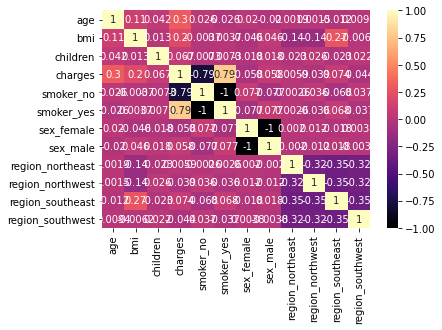

In [47]:
sb.heatmap(dataset.corr(),annot=True,cmap='magma')

## Understanding the distribution

### of the charges

In [87]:
!pip install scipy

In [89]:
from scipy.stats import skew

skew(dataset['charges'])

1.5136902413349014

![Skewness](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/868px-Relationship_between_mean_and_median_under_different_skewness.png)

![Kurthosis](https://www.tutorialspoint.com/statistics/images/kurtosis.jpg)

<AxesSubplot:xlabel='charges', ylabel='Count'>

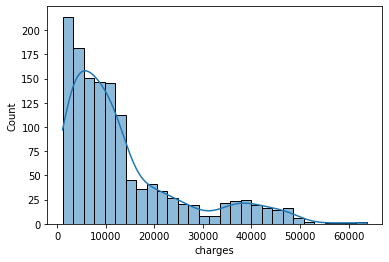

In [48]:
sb.histplot(dataset['charges'], kde=True)

### of the age

<AxesSubplot:xlabel='age', ylabel='Count'>

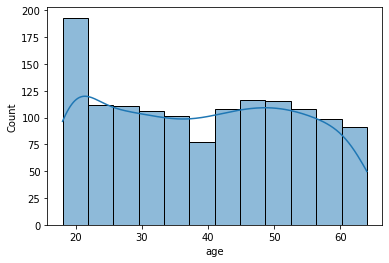

In [49]:
sb.histplot(dataset['age'], kde=True)

#  Feature Exploration

## How many females and males are smokers

In [92]:
old_dataset["sex"].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

<AxesSubplot:xlabel='sex', ylabel='count'>

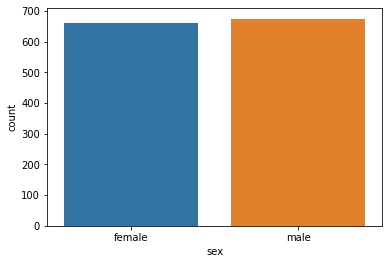

In [50]:
#how many females and males are smokers
sb.countplot(x = "sex", data = old_dataset)

## Smoker who are below or equal to 18 years

<AxesSubplot:xlabel='sex', ylabel='count'>

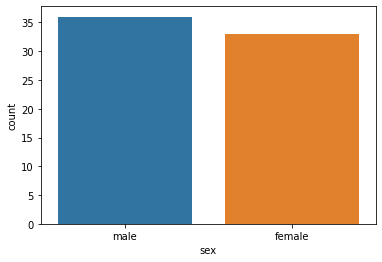

In [51]:
# Smoker who are below or eaual to 18
sb.countplot(x='sex',data=old_dataset[(old_dataset.age <= 18)])

## Number of smokers from different regions

In [96]:
old_dataset.smoker=='yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1337, dtype: bool

In [99]:
(old_dataset.sex=='female')

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334     True
1335     True
1336     True
1337     True
Name: sex, Length: 1337, dtype: bool

In [100]:
# Si 0 -> Faux 0
# Si != 0 -> Vrai 1

# Val_1   Val_2   & (ET BINAIRE)
#     0       0      0    
#     1       0      0
#     0       1      0
#     1       1      1

# | s'appelle un pipe
# Val_1   Val_2   | (OU BINAIRE)
#     0       0      0    
#     1       0      1
#     0       1      1
#     1       1      1

# ^ s'apelle 'OU EXCLUSIF' (XOR)

In [101]:
old_dataset[(old_dataset.age<=25) & (old_dataset.smoker=='yes')]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
30,22,male,35.60,0,yes,southwest,35585.5760
57,18,male,31.68,2,yes,southeast,34303.1672
64,20,female,22.42,0,yes,northwest,14711.7438
82,22,male,37.62,1,yes,southeast,37165.1638
...,...,...,...,...,...,...,...
1282,18,female,21.66,0,yes,northeast,14283.4594
1288,20,male,39.40,2,yes,southwest,38344.5660
1291,19,male,34.90,0,yes,southwest,34828.6540
1308,25,female,30.20,0,yes,southwest,33900.6530


<AxesSubplot:xlabel='region', ylabel='count'>

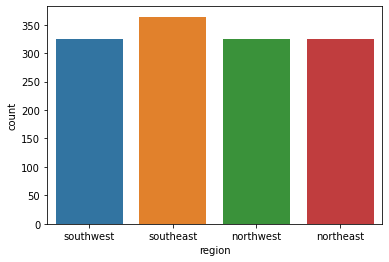

In [110]:
#Smokers from different regions
sb.countplot(x='region',data=old_dataset)

<AxesSubplot:xlabel='region', ylabel='count'>

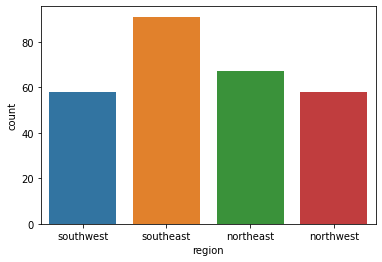

In [52]:
#Smokers from different regions
sb.countplot(x='region',data=old_dataset[(old_dataset.smoker=='yes')])

## Number of children

<AxesSubplot:xlabel='children', ylabel='count'>

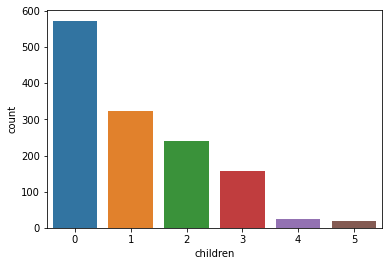

In [53]:
#No. of childrens our patients have

sb.countplot(x='children',data=dataset)

## Number of children of smokers patients

<AxesSubplot:xlabel='children', ylabel='count'>

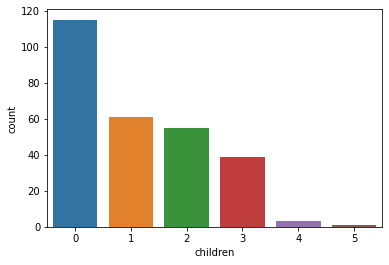

In [54]:
#No. of childrens of smokers patients 

sb.countplot(x='children',data=old_dataset[(old_dataset.smoker=='yes')])

<AxesSubplot:xlabel='children', ylabel='count'>

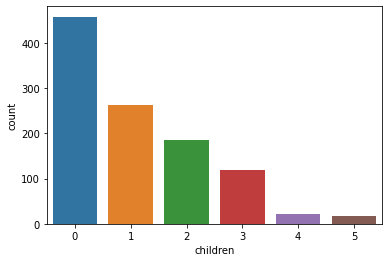

In [102]:
#No. of childrens of smokers patients 

sb.countplot(x='children',data=old_dataset[(old_dataset.smoker=='no')])

In [103]:
old_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Charges in function of target

<AxesSubplot:xlabel='age', ylabel='charges'>

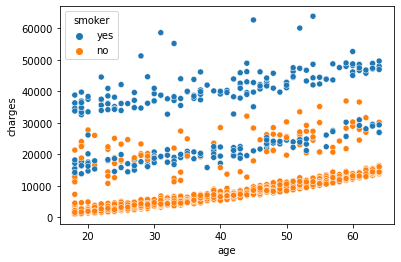

In [105]:
sb.scatterplot(data=old_dataset, x="age", y="charges", hue="smoker")

In [106]:
subset_wealthy = old_dataset[(old_dataset.charges>=30_000)]

<AxesSubplot:xlabel='age', ylabel='charges'>

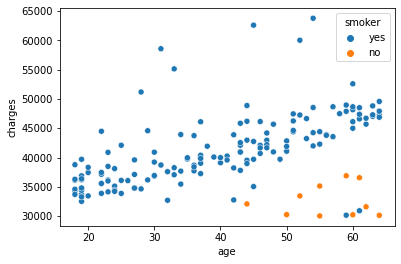

In [108]:
sb.scatterplot(data=subset_wealthy, x="age", y="charges", hue="smoker")

In [109]:
subset_wealthy

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


## Smokers on the basis of age

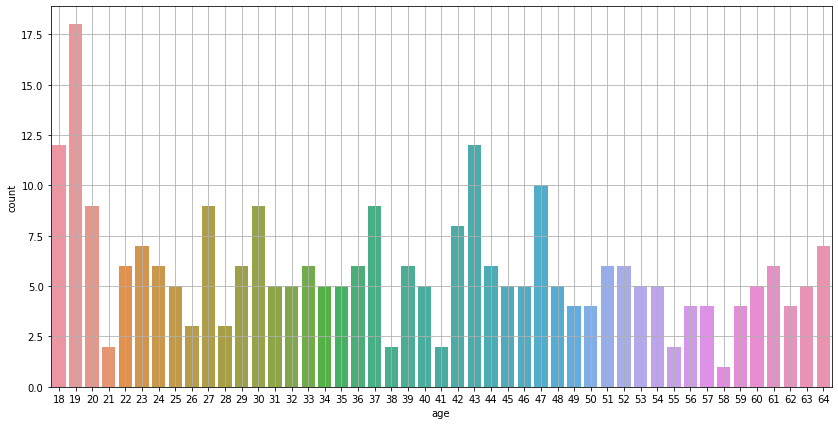

In [112]:
#Smokers on the basis of age
plt.figure(figsize=(14,7))
sb.countplot(x='age',data=dataset[(dataset.smoker_yes==1)])
plt.grid()

## Non-Smokers on the basis of the age

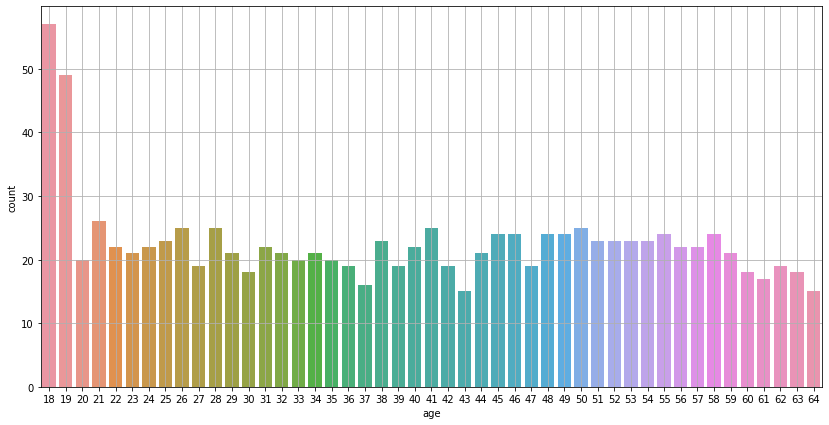

In [56]:
#non-Smokers on the basis of the age
plt.figure(figsize=(14,7))
sb.countplot(x='age',data=old_dataset[(old_dataset.smoker=='no')])
plt.grid()

# Applying regression model

## Splitting the data set into Features et Target

In [57]:
dataset.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


In [58]:
X=dataset.drop(['smoker_no', 'smoker_yes'], axis=1).values
y=dataset['smoker_yes'].values
print(X.shape, y.shape)

(1337, 10) (1337,)


##  Splitting the data set into training and testing data set 

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
print(X.shape, y.shape)

(1337, 10) (1337,)


In [114]:
list_arg = [4, 5, 6]

# args
def func(a, b, c):
    print(f"a{a}, b{b}, c{c}")

func(1,2,3)
func(*list_arg)

dic_arg = {'a': 4,
          'b' : 5,
          'c' : 6}

# kwargs
def func(a=0, b=1, c=2):
    print(f"a{a}, b{b}, c{c}")

func(a=1,b=2)
func(**dic_arg)

a1, b2, c3
a4, b5, c6
a1, b2, c2
a4, b5, c6


## Applying regression model on training set

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 130,
          'max_depth': 5,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': 'ls'}
regressor=GradientBoostingRegressor(**params)
regressor.fit(X_train,y_train)
# print(X.shape, y.shape)

GradientBoostingRegressor(max_depth=5, n_estimators=130)

## Predicting the testing set

In [61]:
y_pred=regressor.predict(X_test)

## Calculating the accuracy of the model

In [62]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.725978620598444

# Explaining results

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

reg = regressor

In [117]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'smoker_no', 'smoker_yes',
       'sex_female', 'sex_male', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [116]:
reg.feature_importances_

array([5.32167105e-02, 1.36463164e-01, 1.79096508e-03, 8.04256972e-01,
       1.10162124e-03, 1.52464614e-03, 8.43543254e-05, 7.04232742e-04,
       2.35985894e-04, 6.21348342e-04])

## Plot training deviance

 we visualize the results. To do that we will first compute the test set deviance and then plot it against boosting iterations.

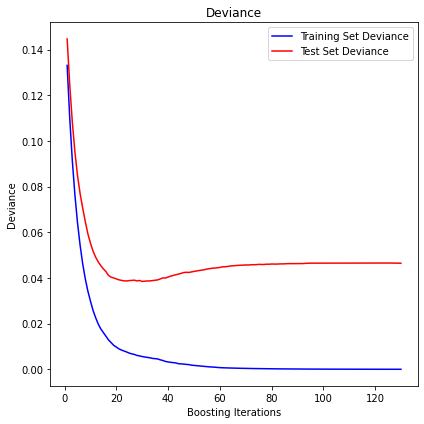

In [64]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## Plot feature importance

impurity-based feature importances can be misleading for high cardinality features (many unique values)

As an alternative, the permutation importances of reg can be computed on a held out test set. 

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular (i.e. : in the form of an array)


The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled

See Permutation feature importance for more details. https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

<bound method Figure.tight_layout of <Figure size 864x432 with 2 Axes>>

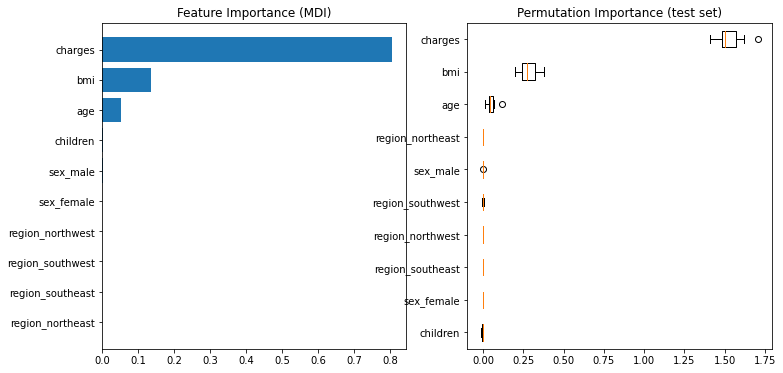

In [65]:
feature_names = dataset.drop(['smoker_no', 'smoker_yes'], axis=1).columns

feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout